In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 

# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv


# Imports


In [3]:
import pandas as pd
import numpy as np

#importing additional libraries 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt 

# Data Loading

In [4]:

def load_my_data() :
    
    # Specifying data files path

    train_data_path = "/kaggle/input/titanic/train.csv"
    test_data_path = "/kaggle/input/titanic/test.csv"

    #Loading the data
    train_data = pd.read_csv(train_data_path)
    test_data = pd.read_csv(test_data_path)

    #Output shapes of the data loaded 
    print("Train Data : {}".format(train_data.shape))
    print("Test Data : {}".format(test_data.shape))
    
    print("Loading Complete!")
    
    return train_data, test_data
    
#############################################################

train_data, test_data = load_my_data()


Train Data : (891, 12)
Test Data : (418, 11)
Loading Complete!


# EDA

In [5]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train_data.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Newsom, Miss. Helen Monypeny",male,NaN,NaN,NaN,CA. 2343,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [8]:
test_data.describe(include = "all")

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3
top,NaN,NaN,"Hee, Mr. Ling",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270
mean,1100.500000,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN
std,120.810458,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN
min,892.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,996.250000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,1100.500000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1204.750000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN


In [12]:
print(train_data.Cabin.value_counts())
train_data.Cabin.dropna().head(20)

C23 C25 C27    4
B96 B98        4
G6             4
F33            3
C22 C26        3
              ..
C99            1
T              1
F G63          1
C148           1
E68            1
Name: Cabin, Length: 147, dtype: int64


1             C85
3            C123
6             E46
10             G6
11           C103
21            D56
23             A6
27    C23 C25 C27
31            B78
52            D33
54            B30
55            C52
61            B28
62            C83
66            F33
75          F G73
88    C23 C25 C27
92            E31
96             A5
97        D10 D12
Name: Cabin, dtype: object

In [63]:
test_df2 = train_data[['Cabin']].dropna()
test_df2["Cabin"].apply(lambda x: "".join(list({y[0] for y in x.split(" ")}))).unique()

array(['C', 'E', 'G', 'D', 'A', 'B', 'F', 'GF', 'EF', 'T'], dtype=object)

In [47]:
test_df = train_data[['Cabin']]
test_df.shape

(891, 1)

no:


In [55]:
test_df = train_data[['Cabin']]
test_df["Cabin"].fillna("Unknown", inplace = True)

test_df["Cabin_Der"] = test_df["Cabin"].apply(lambda x: "".join(list({ y[0]  for y in x.split(" ") })))

cabin_names = ['A','B','C','D','E','F','G','T','U']
for cabin_name in cabin_names :
    test_df["Cabin_"+cabin_name] = test_df["Cabin_Der"].apply(lambda x : 1 if cabin_name in x else 0) 
    
test_df.drop()



/opt/conda/lib/python3.7/site-packages/pandas/core/series.py:4523: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/

In [56]:
test_df.head(20)

,Cabin,Cabin_Der,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U
0,Unknown,U,0,0,0,0,0,0,0,0,1
1,C85,C,0,0,1,0,0,0,0,0,0
2,Unknown,U,0,0,0,0,0,0,0,0,1
3,C123,C,0,0,1,0,0,0,0,0,0
4,Unknown,U,0,0,0,0,0,0,0,0,1
5,Unknown,U,0,0,0,0,0,0,0,0,1
6,E46,E,0,0,0,0,1,0,0,0,0
7,Unknown,U,0,0,0,0,0,0,0,0,1
8,Unknown,U,0,0,0,0,0,0,0,0,1
9,Unknown,U,0,0,0,0,0,0,0,0,1


In [20]:
test_df["Cabin_Derived"] = test_df["Cabin"].apply(lambda x: "".join(list({y[0] for y in x.split(" ")})))

In [22]:
test_df.Cabin_Derived.value_counts()

C     59
B     47
D     33
E     32
A     15
F      9
G      4
FG     3
T      1
FE     1
Name: Cabin_Derived, dtype: int64

# Data Cleaning and Preparation

In [5]:
train_data, test_data = load_my_data()

Train Data : (891, 12)
Test Data : (418, 11)
Loading Complete!


In [7]:
# Data Cleaning and Preparation

#Appoach 1 - Not imputing anything - Drop all the records with missing values - 
#I see that Age and Embarked columns have a few missing values so we can just drop those
#I do see that Cabin has a lot of missing values so I will be excluding those from the final model.

def data_cleanup_and_prep_1():
    #Features on which model will be built
    feature_col = ['Pclass','SibSp','Parch','Fare','Sex']
    #Labels
    label_col = ['Survived']

    #Fetching features from entire training data, dropping null value records
    train_X = train_data[feature_col+label_col]
    train_X.dropna(axis=0, inplace = True)
    print(train_X.shape)

    #Separating labels from cleaned training data
    train_Y = train_X[label_col]
    train_X.drop(label_col, axis=1, inplace=True)
    train_X = pd.get_dummies(train_X)

    print("Shaped of cleaned training data   : {}".format(train_X.shape))
    print("Shaped of cleaned training Labels : {}".format(train_Y.shape))

    #Performing the same cleaning on testing data 
    test_X = test_data[feature_col]
    print("Shape of testing data before cleaning : {}".format(test_X.shape))

    # test_X.dropna(axis=0, inplace=True)
    test_X = pd.get_dummies(test_X)
    print("Shape of testing data post cleaning : {}".format(test_X.shape))

#Approach 2 - Imputing values for missing values 
#Age - on checking quartiles for age, I saw that 50percent of the data points are within 20 to 38, so I decided to replace
#the missing age values with the mean of age.
#Total_Dependents Creating an additional metric, namely TotalDependents which is the sum of Parch and SibSp 

#Fare - Low count of missing values - replacing with mode


#Embarked - Missing values seem to be quite low so replacing by mode (and the place where the ship originates shouldn't ideally have too much of an 
#effect on the survival, but I can check by incorporating this variable once and then removing it and checking for the accuracy again)

#Cabin - Cabin has a lot of missing values, upon analyzing the Cabin Letter, I found that the distribution was quite spread out and
#the cabin numbers were fixed A,B,C,D,E,F,G and T(also checked using google to find out cabins on titanic). So i decided to create 
#some additional columns which would specify which cabin was used by that ticket. I'm not using get_dummies as I'm not sure what happens
#when one of the cabins is missing and that column is not being generated by get_dummies for instance if there was no cabin named 'A'
#in testing data but there was in training data then get_dummies would yeild different results and the model might respond differently
#to that.

def data_cleanup_and_prep_2(train_data, test_data):
    #Features on which model will be built
    feature_col = ['Pclass','SibSp','Parch','Sex','Age','Fare','Cabin','Embarked']
    #Labels
    label_col = ['Survived']
    
    #Fetching features from entire training data
    train_X = train_data[feature_col+label_col]
    print(train_X.shape)
    
    #Separating labels from the data
    train_Y = train_X[label_col]
    train_X.drop(label_col, axis=1, inplace=True)
    
    
    #Data Cleaning for Training Data 
    
    train_X['Total_Dependents'] = train_X['SibSp'] + train_X['Parch']
  
    train_X['Age'] = train_X[['Age']].fillna(value={'Age':train_X.Age.mean(skipna=True)})
    train_X['Embarked'] = train_X[['Embarked']].fillna(value={'Embarked':train_X.Embarked.mode(dropna=True)[0]})
    train_X['Fare'] = train_X[['Fare']].fillna(value={'Fare':train_X.Fare.mode(dropna=True)[0]})
    train_X['Cabin'] = train_X[['Cabin']].fillna(value={'Cabin':"Unknown"})

    ###Getting one hot encoding for Cabin variable
    train_X["Cabin_Derived"] = train_X["Cabin"].apply(lambda x: "".join(list({ y[0]  for y in x.split(" ") })))
    cabin_names = ['A','B','C','D','E','F','G','T','U'] #Found this list by EDA and googling titanic cabins
    for cabin_name in cabin_names :
        train_X["Cabin_"+cabin_name] = train_X["Cabin_Derived"].apply(lambda x : 1 if cabin_name in x else 0) 

    train_X.drop(['Cabin','Cabin_Derived'], axis = 1, inplace=True)

    ###Getting one hot encoding for Embarked and Sex 
    train_X = pd.get_dummies(train_X, columns = ['Sex', 'Embarked'])


    print("Shaped of cleaned training data   : {}".format(train_X.shape))
    print("Shaped of cleaned training Labels : {}".format(train_Y.shape))
    
    ##Data Cleaning for Test Data 
    
    test_X = test_data[feature_col]
    print("Shape of testing data before cleaning : {}".format(test_X.shape))
    test_X['Total_Dependents'] = test_X['SibSp'] + test_X['Parch']
  
    test_X['Age'] = test_X[['Age']].fillna(value={'Age':test_X.Age.mean(skipna=True)})
    test_X['Embarked'] = test_X[['Embarked']].fillna(value={'Embarked':test_X.Embarked.mode(dropna=True)[0]})
    test_X['Fare'] = test_X[['Fare']].fillna(value={'Fare':test_X.Fare.mode(dropna=True)[0]})
    test_X['Cabin'] = test_X[['Cabin']].fillna(value={'Cabin':"Unknown"})

    ###Getting one hot encoding for Cabin variable
    test_X["Cabin_Derived"] = test_X["Cabin"].apply(lambda x: "".join(list({ y[0]  for y in x.split(" ") })))
    cabin_names = ['A','B','C','D','E','F','G','T','U'] #Found this list by EDA and googling titanic cabins
    for cabin_name in cabin_names :
        test_X["Cabin_"+cabin_name] = test_X["Cabin_Derived"].apply(lambda x : 1 if cabin_name in x else 0) 

    test_X.drop(['Cabin','Cabin_Derived'], axis = 1, inplace=True)

    ###Getting one hot encoding for Embarked and Sex 
    test_X = pd.get_dummies(test_X, columns = ['Sex', 'Embarked'])


    print("Shaped of cleaned testing data   : {}".format(test_X.shape))
    
    return train_X, train_Y, test_X
    



In [14]:

train_X, train_Y, test_X = data_cleanup_and_prep_2(train_data, test_data)



(891, 9)
Shaped of cleaned training data   : (891, 20)
Shaped of cleaned training Labels : (891, 1)
Shape of testing data before cleaning : (418, 8)
Shaped of cleaned testing data   : (418, 20)


/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4164: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

In [15]:
train_x, val_x, train_y, val_y = train_test_split(train_X, train_Y, random_state = 510)

# Modelling(with Validation)

In [16]:
rf_model = RandomForestClassifier(n_estimators=100,max_depth=5,random_state=510)
rf_model.fit(train_x, train_y)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(max_depth=5, random_state=510)

In [17]:
val_predictions = rf_model.predict(val_x)
print(accuracy_score(val_y, val_predictions))


0.7982062780269058


In [18]:
rf_model_on_all_data = RandomForestClassifier(n_estimators=100, max_depth=5, random_state = 510)
rf_model_on_all_data.fit(train_X, train_Y)


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(max_depth=5, random_state=510)

In [19]:
test_predictions = rf_model_on_all_data.predict(test_X)

submission_results = pd.DataFrame({'PassengerId' : test_data.PassengerId, 'Survived': test_predictions})
submission_results.to_csv('submission_4_Aug25.csv', index=False)

# Hyperparameter Tuning 

In [36]:
def rf_model_evaluate(train_x, train_y, val_x, val_y, n_estimators, early_stopping = 10, max_depth = 5, random_state = 510):
    rf_model = RandomForestClassifier(n_estimators=n_estimators, max_depth = max_depth, random_state=random_state)
    rf_model.fit(train_x, train_y)
    train_predictions = rf_model.predict(train_x)
    training_acc = accuracy_score(train_y, train_predictions)
    
    val_predictions = rf_model.predict(val_x)
    validation_acc = accuracy_score(val_y, val_predictions)
    
    return training_acc, validation_acc

In [37]:
model_accuracy_df = pd.DataFrame(columns=["Trees","Depth","Training_Accuracy","Validation_Accuracy"])
max_early_stopping_rounds = 20
max_n_estimators = 150
max_depth = 20
random_state = 510
for n_estimators in range(2,max_n_estimators,5):
    for depth in range(5,max_depth):
        training_acc, validation_acc = rf_model_evaluate(train_x, train_y, val_x, val_y, n_estimators, max_early_stopping_rounds, depth, random_state)
        model_accuracy_df = model_accuracy_df.append(pd.DataFrame([[n_estimators, depth, training_acc, validation_acc]], columns = ["Trees", "Depth","Training_Accuracy","Validation_Accuracy"]))


    

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-v

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-v

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-v

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-v

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-v

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-v

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-v

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-v

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-v

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-v

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-v

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-v

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-v

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-v

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-v

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-v

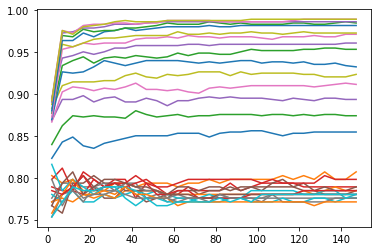

In [38]:
for depth in range(5,max_depth):
    x = model_accuracy_df['Trees'][model_accuracy_df['Depth']==depth]
    training_acc = model_accuracy_df['Training_Accuracy'][model_accuracy_df['Depth']==depth]
    validation_acc = model_accuracy_df['Validation_Accuracy'][model_accuracy_df['Depth']==depth]
    plt.plot(x,training_acc)
    plt.plot(x,validation_acc)
    
plt.show()
    


In [39]:
model_accuracy_df[['Trees','Depth']][model_accuracy_df['Validation_Accuracy'] == model_accuracy_df.Validation_Accuracy.max()]

,Trees,Depth
0,2,14


In [43]:
model_accuracy_df.sort_values(['Validation_Accuracy'], ascending=False)

,Trees,Depth,Training_Accuracy,Validation_Accuracy
0,2,14,0.887725,0.816143
0,7,6,0.862275,0.811659
0,12,17,0.974551,0.807175
0,147,5,0.854790,0.807175
0,17,6,0.872754,0.807175
...,...,...,...,...
0,2,12,0.895210,0.766816
0,7,12,0.943114,0.757848
0,2,15,0.880240,0.757848
0,2,19,0.892216,0.753363


# Creating models with parameters from top 3 validation scores

In [48]:
tree_vs_depth = [(2,14),(7,6),(12,17)]

for tree,depth in tree_vs_depth:
    rf_model_on_all_data = RandomForestClassifier(n_estimators=tree, max_depth=depth, random_state = 510)
    rf_model_on_all_data.fit(train_X, train_Y)
    
    test_predictions = rf_model_on_all_data.predict(test_X)

    submission_results = pd.DataFrame({'PassengerId' : test_data.PassengerId, 'Survived': test_predictions})
    submission_results.to_csv('submission_Aug25_tree_'+str(tree)+'_depth_'+str(depth)+'.csv', index=False)

SyntaxError: EOL while scanning string literal (<ipython-input-48-e65ba48273bd>, line 10)